<a href="https://colab.research.google.com/github/Soman-Awan/Python-Task/blob/master/Glassdoor_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd 
import re 
import string
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction import text
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")


Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [14]:
df = pd.read_csv("Glassdoor_Reviews.csv")

In [17]:
df.head( n = 10)

,Sr. No.,company,location,dates,summary,overall-ratings,Employment Status,job-title,pros,cons
0,1,Mail.ru,Moscow,2-Oct-20,Good for Start,5,Current Employee,Junior Developer,"Interesting tasks, good insurance, loyal employer",You may not really like products of the company
1,2,Mail.ru,Moscow,1-Oct-20,It is strange,3,Current Employee,Software Developer,"Good team, good linear manager","Too few money, bad top managers"
2,3,Mail.ru,Moscow,29-Sep-20,Good Job,5,Current Employee,Product Manager,"Good Salary, Good Team, Good Location","no bonuses, how to career growth?"
3,4,Mail.ru,Moscow,25-Sep-20,Mail.ru is ok,5,Current Employee,Software Engineer,Challenging Tasks and Good Corporate Culture,The pay is not that good
4,5,Mail.ru,Moscow,4-Sep-20,One of the best IT companies,4,Former Employee,Middle Frontend Developer,"Office: Locations, Amenities, gyms. Salaries a...","Bureaucracy, not so many good products for las..."
5,6,Mail.ru,Not Specified,30-Aug-20,The best Russian IT company,5,Current Employee,Manager,You will work with best IT specialist in Russia,I didn't find any cons
6,7,Mail.ru,Not Specified,22-Aug-20,overall it's OK,5,Current Employee,Software Developer,"Cool office, people, company creates comfort f...","there's a little bureaucracy, they don't reall..."
7,8,Mail.ru,Moscow,14-Aug-20,Review of Mailru,5,Former Employee,Marketing Analyst,Management Salary Gym Office People,Locality workplaces noise products
8,9,Mail.ru,Moscow,14-Aug-20,Ok so far,4,Current Employee,Software Engineer,"I have been working in company for 5 month, pr...","Sometimes everything gets too bureaucratic, no..."
9,10,Mail.ru,Moscow,13-Aug-20,Good,4,Former Employee,Software Engineer,"Good Office & Laptop, snacks",You can work till 12 pm


In [18]:
df.shape

(51, 10)

In [19]:
df.dtypes

Sr. No.               int64
company              object
location             object
dates                object
summary              object
overall-ratings       int64
Employment Status    object
job-title            object
pros                 object
cons                 object
dtype: object

In [21]:
for var in df.columns.values:
    if df[var].isnull().sum() > 0:
        print('{}  {}'.format(var , df[var].isnull().sum()))

In [22]:
df.describe()

,Sr. No.,overall-ratings
count,51.000000,51.000000
mean,26.000000,4.313725
std,14.866069,0.734580
min,1.000000,3.000000
25%,13.500000,4.000000
50%,26.000000,4.000000
75%,38.500000,5.000000
max,51.000000,5.000000


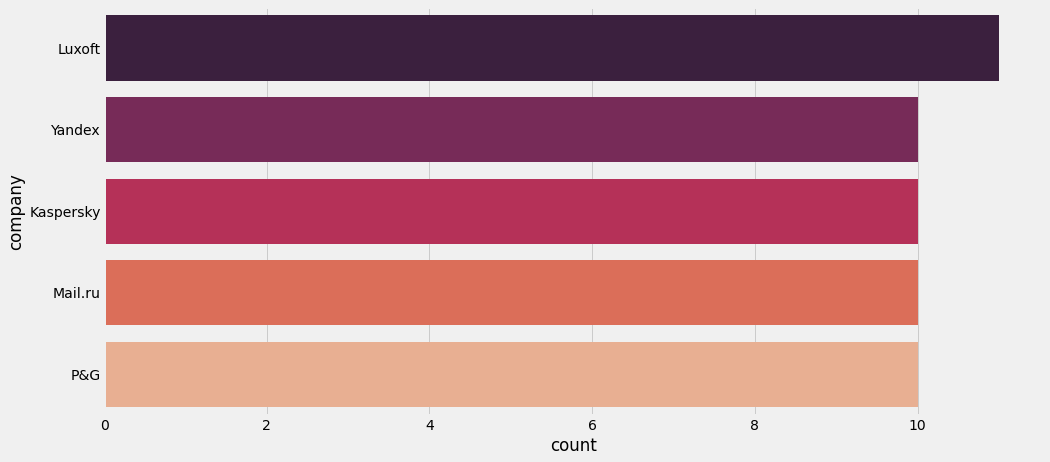

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 7))
sns.countplot(y = 'company' , data = df , palette = 'rocket' , 
              order = df['company'].value_counts().index)
plt.show()

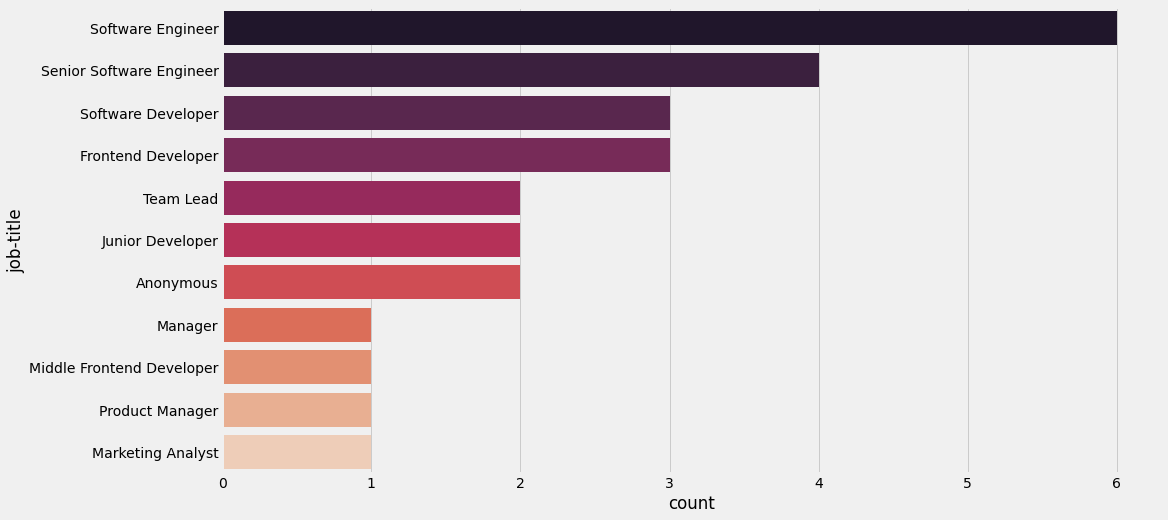

In [25]:
common_job_titles = []
c = Counter(df['job-title']).most_common()[:11]
for n in range(11):
    common_job_titles.append(c[n][0])
    
plt.figure(1 , figsize = (15 , 8))
sns.countplot(y = 'job-title' , data = df[df['job-title'].isin(common_job_titles)] ,
              palette = 'rocket' , 
              order = df[df['job-title'].isin(common_job_titles)]['job-title'].value_counts().index)
plt.show()

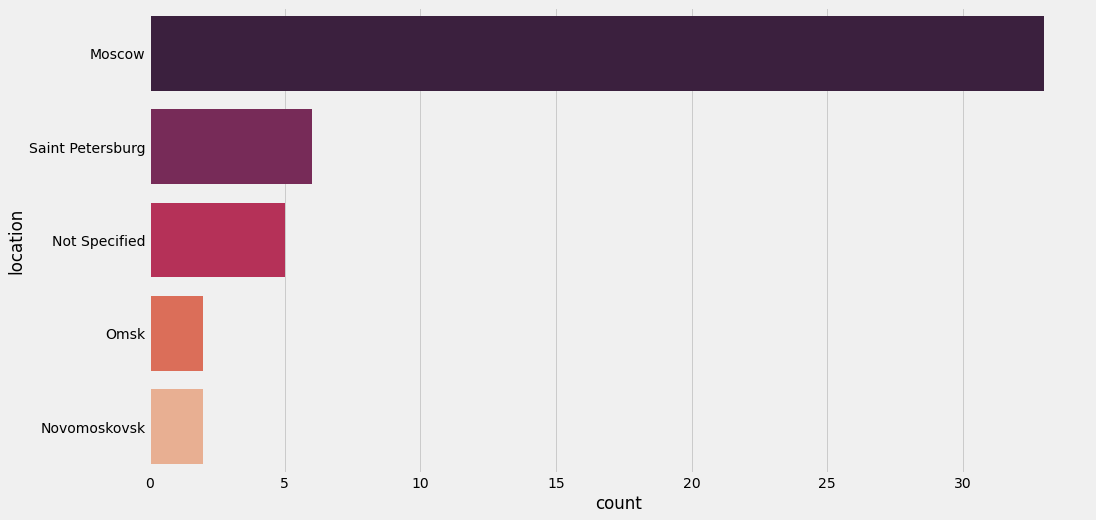

In [28]:
common_location = []
c = Counter(df['location']).most_common()[:5]
for n in range(5):
    common_location.append(c[n][0])
    
plt.figure(1 , figsize = (15 , 8))
sns.countplot(y = 'location' , data = df[df['location'].isin(common_location)] ,
              palette = 'rocket' , 
              order = df[df['location'].isin(common_location)]['location'].value_counts().index)
plt.title('')
plt.show()

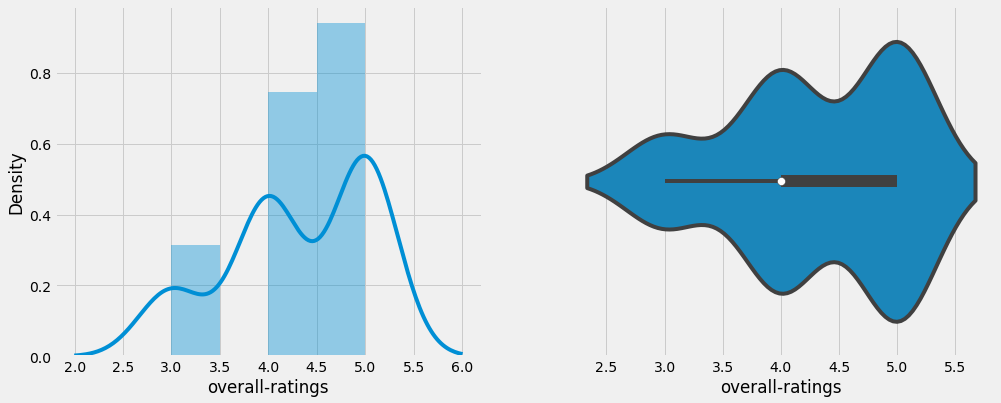

In [43]:
plt.figure(1 , figsize = (15 , 6))
plt.subplot(1 , 2  , 1)
sns.distplot(df['overall-ratings'])

plt.subplot(1 , 2 , 2)
sns.violinplot(x = 'overall-ratings' , data = df)

plt.show()

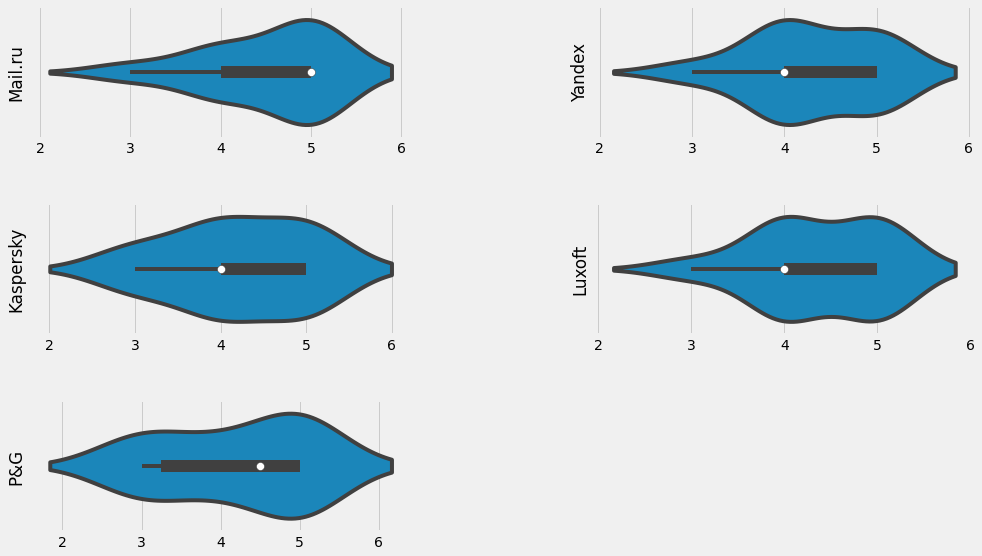

In [44]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for company in df['company'].unique():
    n += 1
    plt.subplot(3 , 2 , n )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = 'overall-ratings' , data = df.where(df['company'] == company))
    plt.xlabel('')
    plt.ylabel(company)
plt.show()

In [53]:
def clean_txt(text):
    text = str(text)
    for n in range(10):
        text = text.replace(str(n) , '')
    text = text.lower()
    text = text.replace("(" , "")
    text = text.replace(")" , "")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    text = text.replace( " \ " , "" )
    text = text.replace("/" , "")
    
    return text

cleaning = lambda x : clean_txt(x)

df['summary'] =  df['summary'].apply(cleaning)
df['pros'] = df['pros'].apply(cleaning)
df['cons'] = df['cons'].apply(cleaning)

combined_smry_dict = {}
for comp in df['company'].unique():
    combined_summary = "" 
    for summary in df['summary'][df['company'] == comp]:
        combined_summary = combined_summary +" "+summary
    
    combined_smry_dict[comp] = combined_summary

df_summary = pd.DataFrame(data=combined_smry_dict , index = [0])
df_summary = pd.DataFrame.copy(df_summary.T)
df_summary.columns = ["summary_corpus"]
df_summary['company'] = df_summary.index

combined_pros_dict = {}
for comp in df['company'].unique():
    combined = "" 
    for pros in df['pros'][df['company'] == comp]:
        combined = combined +" "+pros
    
    combined_pros_dict[comp] = combined

df_pros = pd.DataFrame(data=combined_pros_dict , index = [0])
df_pros = pd.DataFrame.copy(df_pros.T)
df_pros.columns = ["pros_corpus"]
df_pros['company'] = df_pros.index

combined_cons_dict = {}
for comp in df['company'].unique():
    combined = "" 
    for cons in df['cons'][df['company'] == comp]:
        combined = combined +" "+cons
    
    combined_cons_dict[comp] = combined

df_cons = pd.DataFrame(data=combined_cons_dict , index = [0])
df_cons = pd.DataFrame.copy(df_cons.T)
df_cons.columns = ["cons_corpus"]
df_cons['company'] = df_cons.index

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['summary_polarity'] = df['summary'].apply(pol)
df['summary_subjectivity'] = df['summary'].apply(sub)

df['pros_polarity'] = df['pros'].apply(pol)
df['pros_subjectivity'] = df['pros'].apply(sub)

df['cons_polarity']  = df['cons'].apply(pol)
df['cons_subjectivity'] = df['cons'].apply(sub)


NameError: ignored

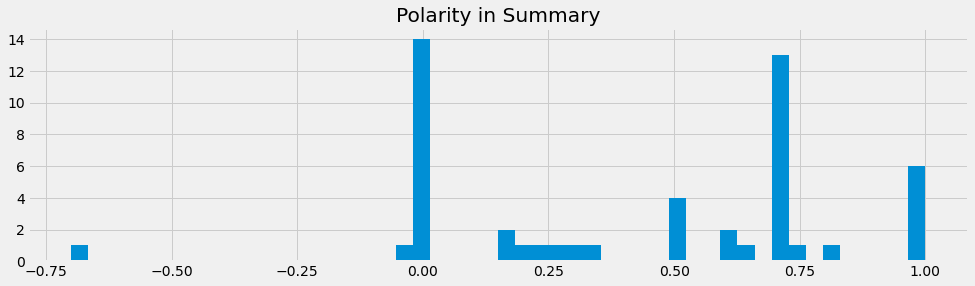

<Figure size 1080x504 with 0 Axes>

In [56]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['summary_polarity'] , bins = 50)
plt.title('Polarity in Summary')

plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['summary_polarity'][df['company'] == comp] , bins = 50 , color = c)
    plt.title(comp)
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['summary_subjectivity'] , bins = 50)
plt.title('Subjectivity')

plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['summary_subjectivity'][df['company'] == comp] , bins = 50 , color = c )
    plt.title(comp)
plt.show()

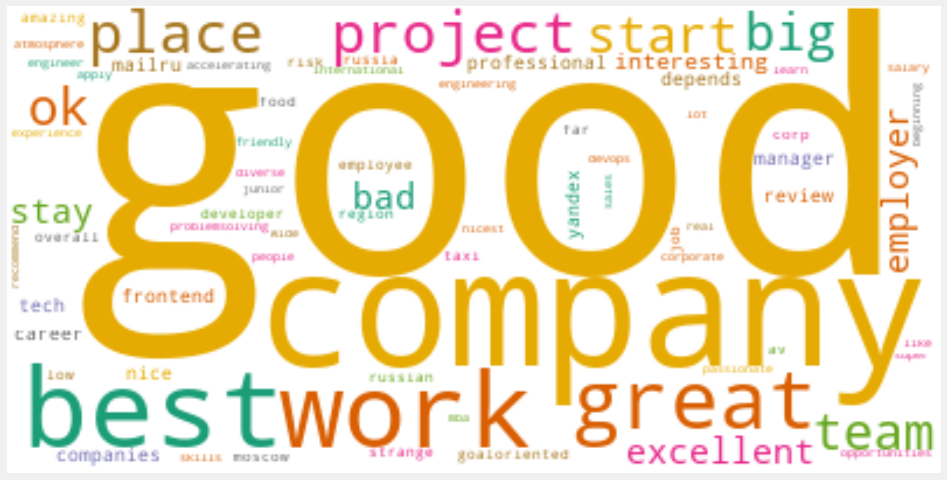

In [58]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df_summary['summary_corpus'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

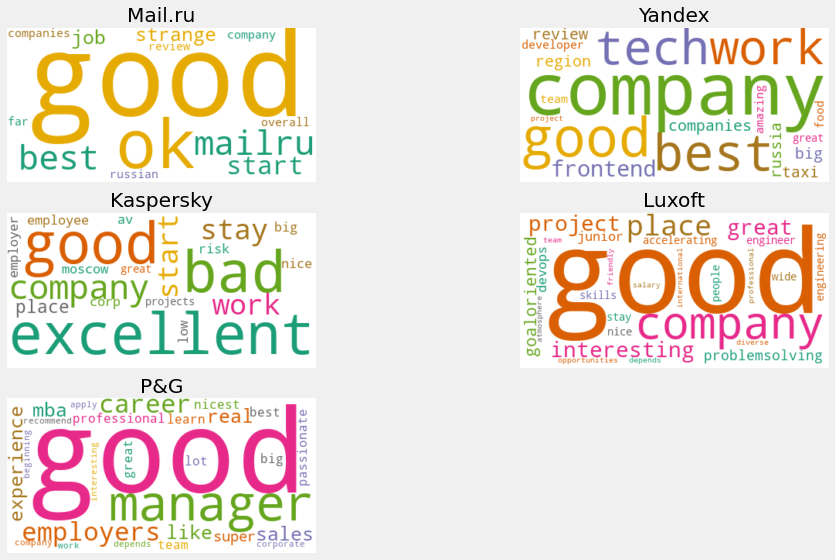

In [59]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS.union(['Mail.ru' , 'Yandex' , 'Kaspersky','Luxoft','P&G']), 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)

plt.figure(1 , figsize = (15 , 9))
for corpus , i in zip(df_summary['summary_corpus'].values,range(6)):
    wc.generate(corpus)
    plt.subplot(3 , 2 , i + 1)
    plt.imshow(wc , interpolation="bilinear")
    plt.axis("off")
    plt.title(df_summary.index[i])
plt.show()

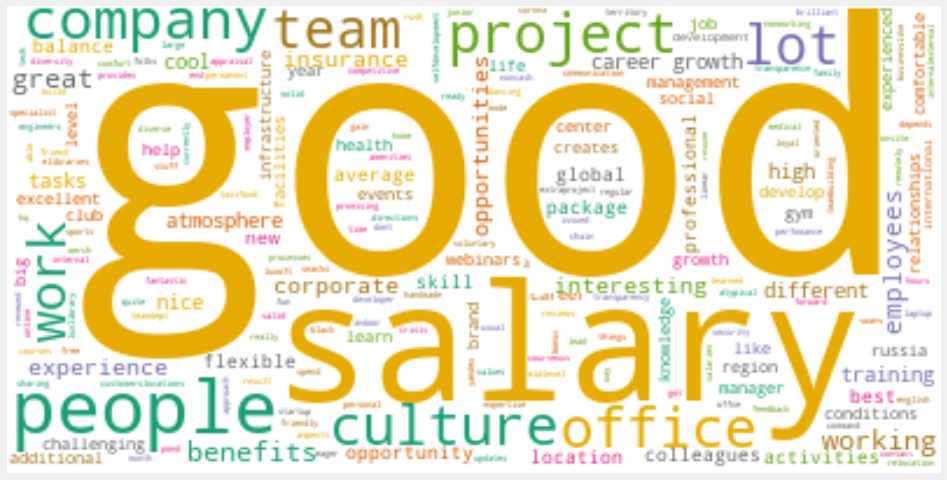

In [61]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df_pros['pros_corpus'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

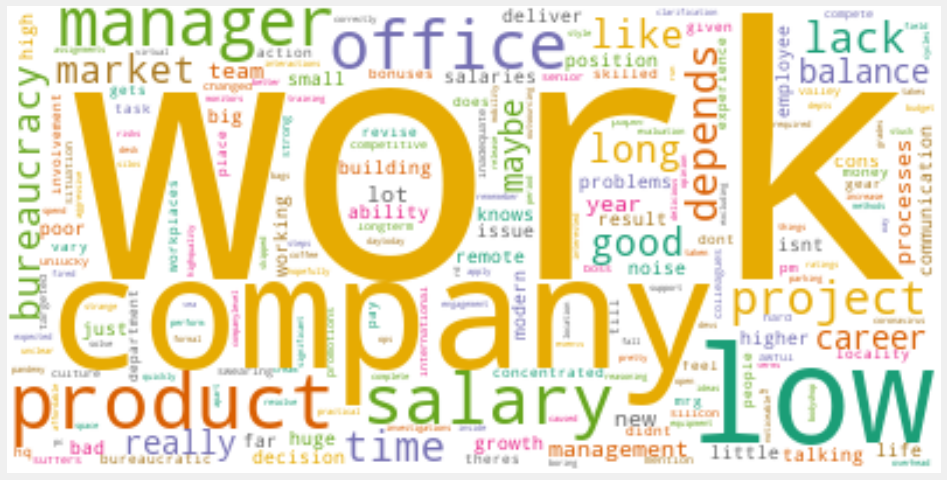

In [62]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df_cons['cons_corpus'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (15 , 8))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()